In [1]:
import pandas as pd
from pandas import merge

import numpy as np
from numpy import arange

from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly.figure_factory as ff

import scipy
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage

import sklearn
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression


from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib auto

import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import seaborn as sns
sns.set(color_codes=True)

from plotly import __version__
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)

from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz as gv

pd.options.display.max_columns = 50




C:\Users\brian\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



Using matplotlib backend: Qt5Agg


C:\Users\brian\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
cf = pd.read_csv('Country_facts.csv')
cf.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
0,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244,62,NaN,NaN,0.836696
1,Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.6,92.1,12.54,5.03,82.43,2.0,29.88,5.20,0.227,0.188,0.585,95,NaN,NaN,0.641629
2,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408,178,NaN,9368.0,0.586193
3,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,0.23,-0.64,51.43,2200.0,74.8,14.4,16.26,9.67,74.07,2.0,30.52,9.72,0.366,0.246,0.387,41,NaN,NaN,0.558027
4,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.430,74,NaN,6911.0,0.486008


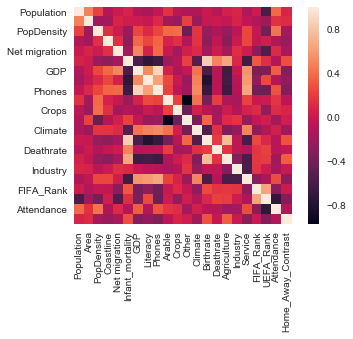

In [3]:

cdemog = cf[['Region', 'Population', 'Area', 'PopDensity', 'Coastline',
       'Net migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'FIFA_Rank', 'UEFA_Rank',
       'Attendance', 'Home_Away_Contrast']] #Subsetting the data
cor = cdemog.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map


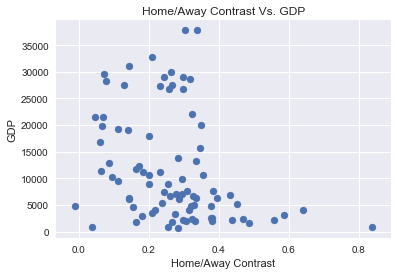

In [183]:
x = cf.Home_Away_Contrast
y = cf.GDP
plt.title("Home/Away Contrast Vs. GDP")
plt.ylabel("GDP")
plt.xlabel("Home/Away Contrast")
plt.scatter(x, y)


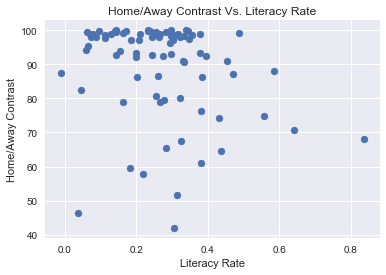

In [179]:
x = cf.Home_Away_Contrast
y = cf.Literacy
plt.title("Home/Away Contrast Vs. Literacy Rate")
plt.xlabel("Literacy Rate")
plt.ylabel("Home/Away Contrast")
plt.axis("normal")
plt.scatter(x, y)

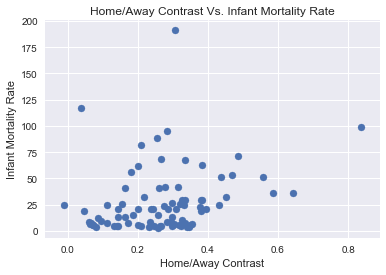

In [176]:
x = cf.Home_Away_Contrast
y = cf.Infant_mortality
plt.title("Home/Away Contrast Vs. Infant Mortality Rate")
plt.ylabel("Infant Mortality Rate")
plt.xlabel("Home/Away Contrast")
plt.scatter(x, y)

In [4]:
census = pd.read_csv("ACS_16_5YR_S1903.csv", encoding="latin-1", skiprows=1)
census.head()

,Id,Id2,Geography,Total; Estimate; Households,Total; Margin of Error; Households,Median income (dollars); Estimate; Households,Median income (dollars); Margin of Error; Households,Total; Estimate; Households - One race-- - Some other race,Total; Margin of Error; Households - One race-- - Some other race,Median income (dollars); Estimate; Households - One race-- - Some other race,Median income (dollars); Margin of Error; Households - One race-- - Some other race,Total; Estimate; FAMILIES - Families,Total; Margin of Error; FAMILIES - Families,Median income (dollars); Estimate; FAMILIES - Families,Median income (dollars); Margin of Error; FAMILIES - Families,Total; Estimate; FAMILIES - Families - With own children of householder under 18 years,Total; Margin of Error; FAMILIES - Families - With own children of householder under 18 years,Median income (dollars); Estimate; FAMILIES - Families - With own children of householder under 18 years,Median income (dollars); Margin of Error; FAMILIES - Families - With own children of householder under 18 years,Total; Estimate; FAMILIES - Families - With no own children of householder under 18 years,Total; Margin of Error; FAMILIES - Families - With no own children of householder under 18 years,Median income (dollars); Estimate; FAMILIES - Families - With no own children of householder under 18 years,Median income (dollars); Margin of Error; FAMILIES - Families - With no own children of householder under 18 years,Total; Estimate; FAMILIES - Families - Married-couple families,Total; Margin of Error; FAMILIES - Families - Married-couple families,...,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Living alone,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Living alone,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Living alone,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Living alone,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Not living alone,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Not living alone,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Not living alone,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Not living alone,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Living alone,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Living alone,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Living alone,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Living alone,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Not living alone,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Not living alone,Median income (dollars); Estim

In [5]:
sl = pd.read_csv('SoccerLeagues.csv')
sl.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN


In [6]:
nba = pd.read_csv('NBA.csv', encoding="latin-1", sep=",")
nba.head()

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976


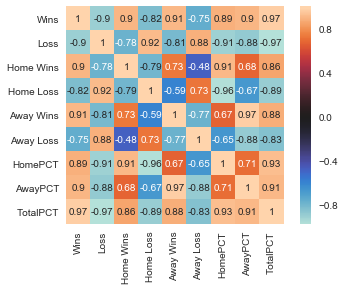

In [7]:
nbacor = nba[['Wins', 'Loss', 'Home Wins', 'Home Loss',
       'Away Wins', 'Away Loss', 'HomePCT', 'AwayPCT', 'TotalPCT']] #Subsetting the data
cor = nbacor.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, center =0, square = True, annot=True) #Plot the correlation as heat map


In [8]:
arr = {"Boston", "New York", "Philadelphia", "Chicago", "Cleveland", "Detroit", "Indianapolis", "Milwaukee", "Atlanta", "Charlotte", "Miami", "Orlando", "Washington", "Denver", "Minneapolis", "Oklahoma", "Portland", "Salt Lake", "Oakland", "Los Angeles", "Phoenix", "Sacramento", "Dallas", "Houston", "Memphis", "New Orleans", "San Antonio"}
nbacensus = census[["Geography", "Total; Estimate; Households", "Median income (dollars); Estimate; Households"]]
nbacensus.head()
metro = {"Boston-Cambridge-Newton, MA-NH Metro Area", "New York-Newark-Jersey City, NY-NJ-PA Metro Area", "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Metro Area", 
         "Chicago-Naperville-Elgin, IL-IN-WI Metro Area",  "Cleveland-Elyria, OH Metro Area", "Detroit-Warren-Dearborn, MI Metro Area",
         "Indianapolis-Carmel-Anderson, IN Metro Area", "Milwaukee-Waukesha-West Allis, WI Metro Area", "Atlanta-Sandy Springs-Roswell, GA Metro Area", 
         "Charlotte-Concord-Gastonia, NC-SC Metro Area",  "Miami-Fort Lauderdale-West Palm Beach, FL Metro Area", "Orlando-Kissimmee-Sanford, FL Metro Area", 
         "Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area", "Denver-Aurora-Lakewood, CO Metro Area", "Minneapolis-St. Paul-Bloomington, MN-WI Metro Area", 
         "Oklahoma City, OK Metro Area", "Portland-Vancouver-Hillsboro, OR-WA Metro Area", "Salt Lake City, UT Metro Area", "San Francisco-Oakland-Hayward, CA Metro Area", 
         "Los Angeles-Long Beach-Anaheim, CA Metro Area", "Phoenix-Mesa-Scottsdale, AZ Metro Area", "Sacramento--Roseville--Arden-Arcade, CA Metro Area", 
         "Dallas-Fort Worth-Arlington, TX Metro Area", "Houston-The Woodlands-Sugar Land, TX Metro Area", "Memphis, TN-MS-AR Metro Area", 
         "New Orleans-Metairie, LA Metro Area", "San Antonio-New Braunfels, TX Metro Area"}

nbametros = nbacensus[nbacensus.Geography.isin(metro)]
nbametros['Metro'], nbametros['StateAbb.'] = nbametros['Geography'].str.split(',', 1).str
nbametros['StateAbb.'] = nbametros['StateAbb.'].str.replace('Metro Area','')
nbametros = nbametros[['Metro', 'StateAbb.', 'Median income (dollars); Estimate; Households']]
nbametros.head()

,Metro,StateAbb.,Median income (dollars); Estimate; Households
19,Atlanta-Sandy Springs-Roswell,GA,59183
44,Boston-Cambridge-Newton,MA-NH,77809
66,Charlotte-Concord-Gastonia,NC-SC,55191
70,Chicago-Naperville-Elgin,IL-IN-WI,63327
75,Cleveland-Elyria,OH,51001


In [9]:
nbacluster = nba.drop('Year', 1)
cols = nbacluster.columns[1:]
cluster = KMeans(n_clusters=4)
nbacluster["cluster"] = cluster.fit_predict(nbacluster[nbacluster.columns[2:]])

In [10]:
pca = PCA(n_components=2)
nbacluster["x"] = pca.fit_transform(nbacluster[cols])[:, 0]
nbacluster["y"] = pca.fit_transform(nbacluster[cols])[:, 1]
nbacluster = nbacluster.reset_index()
team_clusters = nbacluster[["Team", "cluster", "x", "y"]]
team_clusters.head()

,Team,cluster,x,y
0,Atlanta Hawks,3,11.835234,-0.777508
1,Atlanta Hawks,3,11.982275,3.236195
2,Atlanta Hawks,2,-9.004553,-0.735961
3,Atlanta Hawks,2,-8.692195,-0.901725
4,Atlanta Hawks,3,8.402800,-1.876648


In [11]:
final = merge(nbacluster, team_clusters)
final.head()

,index,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
0,0,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366,3,11.835234,-0.777508
1,1,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366,3,11.982275,3.236195
2,2,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024,2,-9.004553,-0.735961
3,3,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024,2,-8.692195,-0.901725
4,4,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976,3,8.402800,-1.876648


In [12]:
trace0 = go.Scatter(x = team_clusters[team_clusters.cluster ==0]["x"],
                    y = team_clusters[team_clusters.cluster ==0]["y"],
                    name = "Cluster 1", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(15, 152, 152, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   ) 
trace1 = go.Scatter(x = team_clusters[team_clusters.cluster ==1]["x"],
                    y = team_clusters[team_clusters.cluster ==1]["y"],
                    name = "Cluster 2", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(180, 18, 180, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace2 = go.Scatter(x = team_clusters[team_clusters.cluster ==2]["x"],
                    y = team_clusters[team_clusters.cluster ==2]["y"],
                    name = "Cluster 3", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(132, 132, 132, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace3 = go.Scatter(x = team_clusters[team_clusters.cluster ==3]["x"],
                    y = team_clusters[team_clusters.cluster ==3]["y"],
                    name = "Cluster 4", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(100, 15, 100, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )

In [13]:
data = [trace0, trace1, trace2, trace3]
iplot(data)

In [14]:
final["cluster"].value_counts()

3    454
2    343
1    324
0    189
Name: cluster, dtype: int64

In [15]:
final[final.cluster ==0]["Team"].head()

34        Atlanta Hawks
38        Atlanta Hawks
39        Atlanta Hawks
48    Baltimore Bullets
52    Baltimore Bullets
Name: Team, dtype: object

In [16]:
final[final.cluster ==0].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,627.650794,21.243386,60.460317,13.952381,26.164021,6.820106,33.121693,0.346768,0.169578,0.259905,0.0,-33.805449,-0.804262


In [17]:
final[final.cluster ==1]["Team"].head()

21    Atlanta Hawks
23    Atlanta Hawks
28    Atlanta Hawks
30    Atlanta Hawks
32    Atlanta Hawks
Name: Team, dtype: object

In [18]:
final[final.cluster ==1].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,613.296296,54.947531,24.694444,31.200617,7.654321,22.57716,16.598765,0.802724,0.573171,0.688139,1.0,25.964864,1.050907


In [19]:
final[final.cluster ==2]["Team"].head()

2    Atlanta Hawks
3    Atlanta Hawks
5    Atlanta Hawks
6    Atlanta Hawks
7    Atlanta Hawks
Name: Team, dtype: object

In [20]:
final[final.cluster ==2].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,585.274052,32.842566,48.090379,21.139942,18.069971,10.574344,28.41691,0.536675,0.268733,0.404569,2.0,-13.048029,-0.702869


In [21]:
final[final.cluster ==3]["Team"].head()

0     Atlanta Hawks
1     Atlanta Hawks
4     Atlanta Hawks
9     Atlanta Hawks
10    Atlanta Hawks
Name: Team, dtype: object

In [22]:
final[final.cluster ==3].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,620.438326,43.451542,36.784141,26.696035,12.374449,15.662996,23.455947,0.682327,0.397614,0.540044,3.0,5.765096,-0.336792


In [23]:
X = nba[["HomePCT", "AwayPCT"]]
Y = nba['Home Wins']

In [24]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(814, 2)
(402, 2)
(814,)
(402,)


In [25]:
sl["HWPCT"] = abs((sl.iloc[:, 8]+sl.iloc[:, 9])/(sl.iloc[:, 6]))

In [26]:
def dtclasses (sl):
 
    if sl["HWPCT"] >= 0.5:
        return 0
    elif sl["HWPCT"] < 0.5:
        return 1
   
sl["Class"]=sl.apply(lambda sl: dtclasses(sl), axis=1)
sl.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15,HWPCT,Class
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN,0.205882,1
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN,0.411765,1
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN,0.172414,1
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN,0.172414,1
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN,0.266667,1


In [27]:
features = ['HomeWins']
X = sl[features]
y= sl["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
model = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9890057361376673

In [28]:
confusion_matrix(y_test, y_predict)

array([[  41,    5],
       [  18, 2028]], dtype=int64)

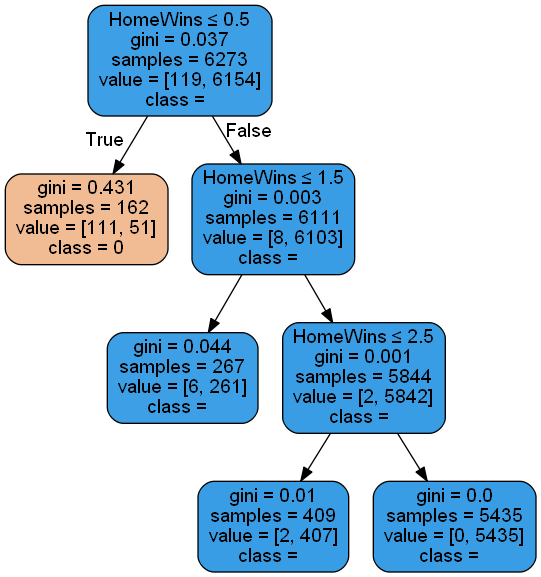

In [29]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=features, class_names= str(sl.Class), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
graph.write_pdf("HWtree.pdf")

True

In [31]:
sl.Class.value_counts()

1    8200
0     165
Name: Class, dtype: int64

In [32]:
features = ['AwayWins']
X = sl[features]
y= sl["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
model2 = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

y_predict = model2.predict(X_test)
accuracy_score(y_test,y_predict)

0.9780114722753346

In [33]:
confusion_matrix(y_test, y_predict)

array([[   0,   46],
       [   0, 2046]], dtype=int64)

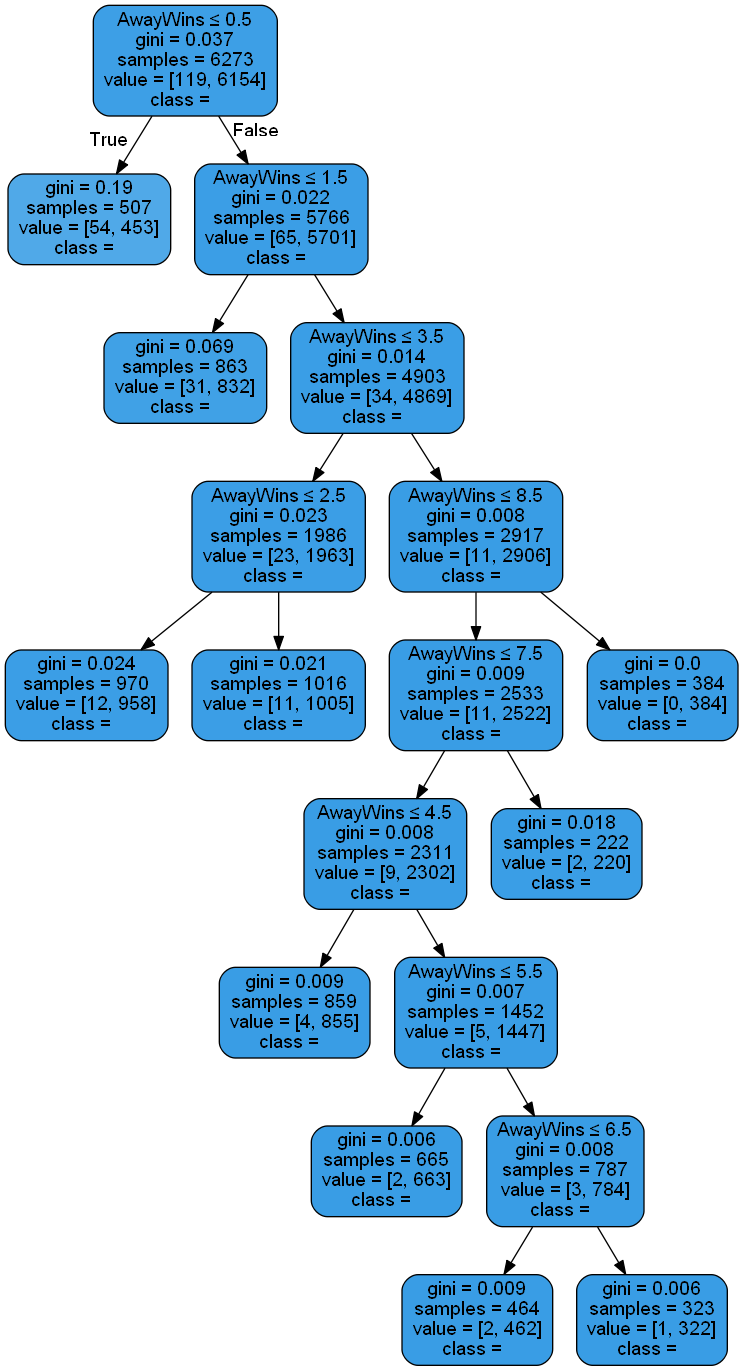

In [34]:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data, feature_names=features, class_names= str(sl.Class), filled=True, rounded=True, special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph2.create_png())

In [35]:
graph.write_pdf("AWtree.pdf")

True

In [36]:
topClist =sl.loc[sl['Class'] == 0]["Country"].unique()
topClist

array(['Angola', 'Argentina', 'Azerbaijan', 'Belgium', 'Bosnia',
       'Cameroon', 'Chile', 'China', 'Colombia', 'Congo', 'Cyprus',
       'Ecuador', 'Egypt', 'El', 'Estonia', 'France', 'Ghana', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Ivory',
       'Japan', 'Lebanon', 'Lithuania', 'Mali', 'Mexico', 'Moldova',
       'New', 'Nicaragua', 'Panama', 'Papua', 'Paraguay', 'Peru',
       'Puerto', 'Qatar', 'Russia', 'Scotland', 'Serbia', 'Sudan',
       'Thailand', 'Trinidad', 'Turkey', 'Ukraine', 'United',
       'Uzbekistan', 'Wales'], dtype=object)

In [37]:
#Top five contries in terms of team performance with 50% or more home wins or draws each season. 
sl.loc[sl['Class'] == 0]["Country"].value_counts().head()


Congo       15
Ivory       11
Cameroon     8
United       7
Ireland      7
Name: Country, dtype: int64

In [186]:
#Grabbing the top by population, since names would show up blank
#cf.loc[(cf.Country =="Congo, Dem. Rep.") |( cf.Country =="Ivory") | (cf.Country =="Cameroon") | (cf.Country =="United States") | (cf.Country =="Ireland")]
topSocC = cf.loc[(cf.Population ==62660551) |( cf.Population ==24000000) | (cf.Population ==17340702) | (cf.Population ==298444215) | (cf.Population ==4062235)]
topSocC

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
31,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787,27,NaN,NaN,0.302159
38,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,62660551,2345410,26.7,0.00,0.00,94.69,700.0,65.5,0.2,2.96,0.52,96.52,2.0,43.69,13.27,0.550,0.110,0.340,59,NaN,NaN,0.284058
43,Cameroon,SUB-SAHARAN AFRICA,17340702,475440,36.5,0.08,0.00,68.26,1800.0,79.0,5.7,12.81,2.58,84.61,1.5,33.89,13.47,0.448,0.170,0.382,61,NaN,NaN,0.266766
75,Ivory,NaN,24000000,322463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,0.091704
79,Ireland,WESTERN EUROPE,4062235,70280,57.8,2.06,4.99,5.39,29600.0,98.0,500.5,15.20,0.03,84.77,3.0,14.45,7.82,0.050,0.460,0.490,91,NaN,NaN,0.072135


In [151]:
topsoc.describe().loc[['mean']]

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Attendance,Home_Away_Contrast
mean,81301540.6,2569002.6,38.0,0.5875,2.1,43.71,17475.0,84.875,351.1,12.525,0.8375,2.375,26.5425,10.705,0.2645,0.236,0.49975,NaN,0.203364


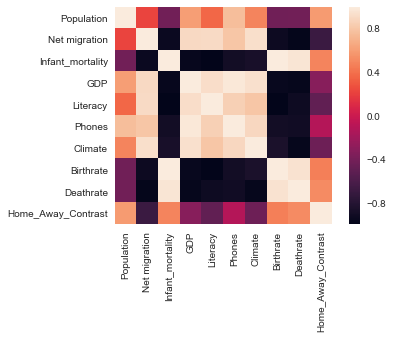

In [155]:
topsoc = topSocC[['Population', 'Net migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
                  'Climate', 'Birthrate', 'Deathrate', 'Home_Away_Contrast']] #Subsetting the data
topsoccor = topsoc.corr() #Calculate the correlation of the above variables
sns.heatmap(topsoccor, square = True) #Plot the correlation as heat map


In [39]:
dummy_marks = pd.get_dummies(sl["HomeWins"], prefix="HomeWins")
dummy_marks.head()

,HomeWins_0,HomeWins_1,HomeWins_2,HomeWins_3,HomeWins_4,HomeWins_5,HomeWins_6,HomeWins_7,HomeWins_8,HomeWins_9,HomeWins_10,HomeWins_11,HomeWins_12,HomeWins_13,HomeWins_14,HomeWins_15,HomeWins_16,HomeWins_17,HomeWins_18,HomeWins_19
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
cols_to_keep = ["Class", "HomeRatio"]
data = sl[cols_to_keep].join(dummy_marks.loc[:, "HomeWins_0":])

In [41]:
data["intercept"]=1.0
data.head()

,Class,HomeRatio,HomeWins_0,HomeWins_1,HomeWins_2,HomeWins_3,HomeWins_4,HomeWins_5,HomeWins_6,HomeWins_7,HomeWins_8,HomeWins_9,HomeWins_10,HomeWins_11,HomeWins_12,HomeWins_13,HomeWins_14,HomeWins_15,HomeWins_16,HomeWins_17,HomeWins_18,HomeWins_19,intercept
0,1,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
1,1,-8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
3,1,14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [42]:
xData = data[data.columns[1:]]
yData = data["Class"]

In [43]:
logit = sm.Logit(yData, xData)

In [44]:
results = logit.fit()

         Current function value: 0.023621
         Iterations: 35


C:\Users\brian\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [45]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 8365
Model:                          Logit   Df Residuals:                     8344
Method:                           MLE   Df Model:                           20
Date:                Mon, 30 Apr 2018   Pseudo R-squ.:                  0.7564
Time:                        20:33:58   Log-Likelihood:                -197.59
converged:                      False   LL-Null:                       -811.13
                                        LLR p-value:                1.201e-247
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
HomeRatio       0.0500      0.018      2.819      0.005       0.015       0.085
HomeWins_0    -17.8485   9.51e+06  -1.88e-06      1.000   -1.86e+07    1.86e+07
HomeWins_1    -13.4387   9.51e+06  -1.41e-06      1.000   -1.86e+07    1.86e+07
HomeWins_2    -11.7448   9.51e+06  -1.23e-06      1.000   -1.86e+07    1.86e+07
HomeWins_3      5.1743   9.51e+06   5.44e-07      1.000   -1.86e+07    1.86e+07
HomeWins_4      6.2584   9.51e+06   6.58e-07      1.000   -1.86e+07    1.86e+07
HomeWins_5      5.0033   9.51e+06   5.26e-07      1.000   -1.86e+07    1.86e+07
HomeWins_6      4.9028   9.51e+06   5.15e-07      1.000   -1.86e+07    1.86e+07
HomeWins_7      4.7597   9.51e+06      5e-07      1.000   -1.86e+07    1.86e+07
HomeWins_8      4.4145   9.51e+06   4.64e-07      1.000   -1.86e+07    1.86e+07
HomeWins_9      4.9437   9.51e+06    5.2e-07      1.000   -1.86e+07    1.86e+07
HomeWins_10     3.8510   9.51e+06   4.05e-07      1.000   -1.86e+07    1.86e+07
HomeWins_11     3.2252   9.51e+06   3.39e-07      1.000   -1.86e+07    1.86e+07
HomeWins_12     4.8735   9.51e+06   5.12e-07      1.000   -1.86e+07    1.86e+07
HomeWins_13     3.4098   9.51e+06   3.59e-07      1.000   -1.86e+07    1.86e+07
HomeWins_14     3.2232   9.51e+06   3.39e-07      1.000   -1.86e+07    1.86e+07
HomeWins_15     1.3276   9.51e+06    1.4e-07      1.000   -1.86e+07    1.86e+07
HomeWins_16     2.1958   9.51e+06   2.31e-07      1.000   -1.86e+07    1.86e+07
HomeWins_17     2.4165   9.51e+06   2.54e-07      1.000   -1.86e+07    1.86e+07
HomeWins_18     0.4280   9.51e+06    4.5e-08      1.000   -1.86e+07    1.86e+07
HomeWins_19    -0.0672   9.51e+06  -7.06e-09      1.000   -1.86e+07    1.86e+07
intercept      17.3080   9.51e+06   1.82e-06      1.000   -1.86e+07    1.86e+07
===============================================================================

Possibly complete quasi-separation: A fraction 0.86 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [46]:
#Those greater than 1 have a greater probabilty of occurring
print(np.exp(results.params))

HomeRatio      1.051285e+00
HomeWins_0     1.772102e-08
HomeWins_1     1.457601e-06
HomeWins_2     7.930273e-06
HomeWins_3     1.766780e+02
HomeWins_4     5.223678e+02
HomeWins_5     1.488992e+02
HomeWins_6     1.346608e+02
HomeWins_7     1.167113e+02
HomeWins_8     8.263839e+01
HomeWins_9     1.402875e+02
HomeWins_10    4.704130e+01
HomeWins_11    2.515849e+01
HomeWins_12    1.307788e+02
HomeWins_13    3.025857e+01
HomeWins_14    2.510927e+01
HomeWins_15    3.771798e+00
HomeWins_16    8.986995e+00
HomeWins_17    1.120700e+01
HomeWins_18    1.534167e+00
HomeWins_19    9.350381e-01
intercept      3.286683e+07
dtype: float64


In [47]:
#Confidence intervals
print(results.conf_int())

                        0             1
HomeRatio    1.523978e-02  8.478634e-02
HomeWins_0  -1.864163e+07  1.864159e+07
HomeWins_1  -1.864162e+07  1.864160e+07
HomeWins_2  -1.864162e+07  1.864160e+07
HomeWins_3  -1.864160e+07  1.864161e+07
HomeWins_4  -1.864160e+07  1.864162e+07
HomeWins_5  -1.864160e+07  1.864161e+07
HomeWins_6  -1.864160e+07  1.864161e+07
HomeWins_7  -1.864160e+07  1.864161e+07
HomeWins_8  -1.864160e+07  1.864161e+07
HomeWins_9  -1.864160e+07  1.864161e+07
HomeWins_10 -1.864161e+07  1.864161e+07
HomeWins_11 -1.864161e+07  1.864161e+07
HomeWins_12 -1.864161e+07  1.864162e+07
HomeWins_13 -1.864161e+07  1.864161e+07
HomeWins_14 -1.864161e+07  1.864162e+07
HomeWins_15 -1.864161e+07  1.864161e+07
HomeWins_16 -1.864161e+07  1.864161e+07
HomeWins_17 -1.864162e+07  1.864163e+07
HomeWins_18 -1.864161e+07  1.864161e+07
HomeWins_19 -1.864162e+07  1.864162e+07
intercept   -1.864159e+07  1.864163e+07


IndexError: tuple index out of range

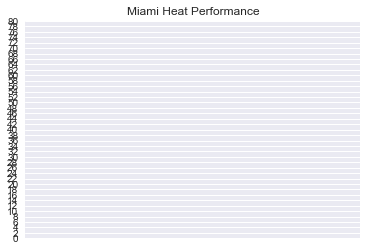

In [48]:

miaheat = nba.loc[nba["Team"] == 'Miami Heat']
miaheat
Nhea = len(miaheat)
ind = np.arange(Nhea)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, miaheat.iloc[:,4], width)
p2 = plt.bar(ind, miaheat.iloc[:,5], width, bottom=miaheat.iloc[:,4])
p3 = plt.bar(ind, miaheat.iloc[:,6], width, bottom=miaheat.iloc[:,5]+miaheat.iloc[:,4])
p4 = plt.bar(ind, miaheat.iloc[:,7], width, bottom=miaheat.iloc[:,6]+miaheat.iloc[:,5]+miaheat.iloc[:,4])


plt.ylabel('')
plt.title('Miami Heat Performance')
plt.xticks(ind, miaheat['Year'])
plt.yticks(np.arange(0, 82, 2))

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Home Wins', 'Home Loss', 'Away Wins', 'Away Loss'))

plt.show()

In [ ]:
NAll = len(sl)
ind = np.arange(NAll)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, sl.iloc[:,8], width, color="b")
p2 = plt.bar(ind, sl.iloc[:,9], width, bottom=sl.iloc[:,8], color="r")
p3 = plt.bar(ind, sl.iloc[:,10], width, bottom=sl.iloc[:,9]+sl.iloc[:,8], color="y")
p4 = plt.bar(ind, sl.iloc[:,11], width, bottom=sl.iloc[:,10]+sl.iloc[:,9]+sl.iloc[:,8], color="purple")
p5 = plt.bar(ind, sl.iloc[:,12], width, bottom=sl.iloc[:,11]+sl.iloc[:,10]+sl.iloc[:,9]+sl.iloc[:,8], color="orange")
p6 = plt.bar(ind, sl.iloc[:,13], width, bottom= sl.iloc[:,12]+sl.iloc[:,11]+sl.iloc[:,10]+sl.iloc[:,9]+sl.iloc[:,8], color="green")
p7 = plt.bar(ind, sl.iloc[:,11], width, bottom= sl.iloc[:,13]+sl.iloc[:,12]+sl.iloc[:,11]+sl.iloc[:,10]+sl.iloc[:,9]+sl.iloc[:,8], color="black")




plt.ylabel('')
plt.title('NBA Team Average Performance')
plt.xticks(ind, nba['Year'])
plt.yticks(np.arange(0, 82, 1))

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('Home Wins', 'Home Loss', 'Away Wins', 'Away Loss'))

#plt.show()

In [ ]:
NAll = len(nba)
ind = np.arange(NAll)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nba.iloc[:,4], width, color="b")
p2 = plt.bar(ind, nba.iloc[:,5], width, bottom=nba.iloc[:,4], color="r")
p3 = plt.bar(ind, nba.iloc[:,6], width, bottom=nba.iloc[:,5]+nba.iloc[:,4], color="y")
p4 = plt.bar(ind, nba.iloc[:,7], width, bottom=nba.iloc[:,6]+nba.iloc[:,5]+nba.iloc[:,4], color="black")


plt.ylabel('')
plt.title('NBA Team Average Performance')
plt.xticks(ind, nba['Year'])
plt.yticks(np.arange(0, 82, 1))

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Home Wins', 'Home Loss', 'Away Wins', 'Away Loss'))

#plt.show()